# Question 1
 Recall the capture-release-recapture problem: Catch m sh, mark them and release them
 back into the lake. Allow the sh to mix well and then you catch m sh. Of these p are
 those that were marked before. Assume that the actual sh population in the lakes is n
 and has not changed between the catches. Let Pmp(n) be the probability of the event (for
 a xed p recatches out of m) coming from n sh in the lake. Generate a plot for Pmp(n)
 as a function of n for the following values of m and p : m = 100 and p = 10205075 For
 each of these p use the plots to estimate (educated guess) the actual value of n i.e., what
 is the best guess for n if m = 100 and you catch p of the marked sh after mixing them
 up. Call these four estimates n1
 n4 You de ne your notion of best guess. Do not
 search, THINK!

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import binom
import pandas as pd
from scipy.special import comb

In [41]:
m = 100
p = [10, 20, 50, 75]

maximum probabilty is at n = 999.0


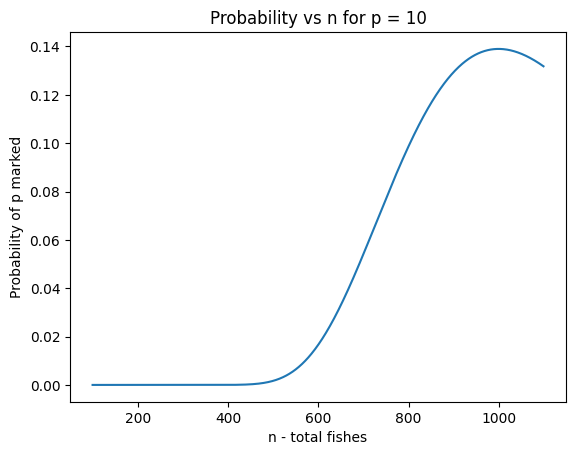

maximum probabilty is at n = 499.0


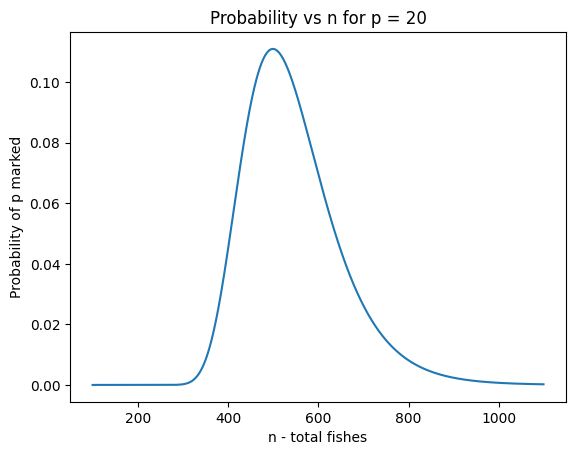

maximum probabilty is at n = 199.0


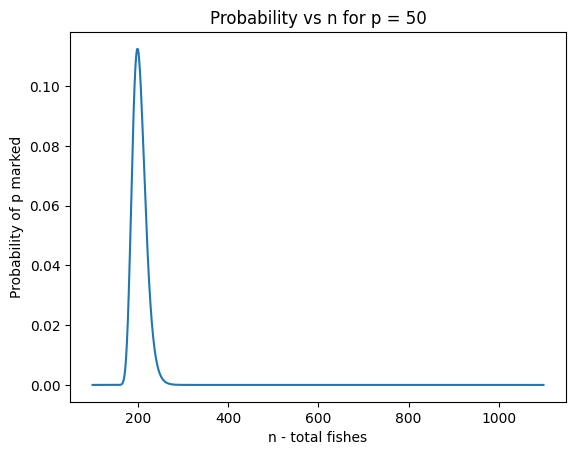

maximum probabilty is at n = 133.0


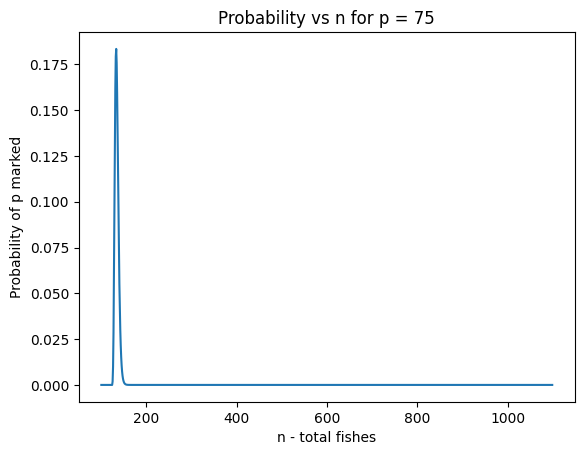

In [42]:
size = 1000
for j in p:
 n = np.zeros(size)
 prob = np.zeros(size)
 log_numerator = np.zeros(size)
 log_denominator = np.zeros(size)
 log_prob = np.zeros(size)
 c = m
 max_prob = 0
 max_n=0
 for i in range(1000):
  n[i] = c
  prob[i] = (math.comb(m, j) * math.comb(int(n[i])-m, m-j)) / (math.comb(int(n[i]), m))
  if prob[i] > max_prob:
   max_prob = prob[i]
   max_n = n[i]
  c += 1
 print('maximum probabilty is at n = {}'.format(max_n))
 plt.plot(n, prob)

 plt.title('Probability vs n for p = {}'.format(j))
 plt.xlabel('n - total fishes')
 plt.ylabel('Probability of p marked')

 plt.show()

# Question 2
Consider the following discrete time system. Packets arrive randomly at at router to be
 transmitted on a link. The time between successive packets are independent geometric
 random variables with parameter Packet transmission times are also random and have
 a geometric distribution with parameter
Only one packet can be transmitted at any
 time and packets that arrive during the transmission of a previously arrived packet wait
 in bu er memory. There is innte memory and can accommodate any number of packets.
 This can be simulated as follows. At the beginning of each second, if there is a packet
 in the bu er, it leaves with probability
And a new packet is added to the queue with
 probability
Simulate this queue for 1,000,000 time steps. For n = 0
 50 plot p(n)
 the fraction of time that there are are n packets in the queue. Also nd the time average
 of the number of packets in the memory.

# This will not be independent
Why will this not be independent? Because here we are calculating random value before hand but probability dosen't work like that. It like tossing a coin. If my I want to remove a packet and add a packet with some probabilities given to both of them.

Now since both of them have probabilities, getting head on the coin for removing event doesn't decide for adding event. And if you do so that means your event are not independent.

Since they are, we must use np.random.rand for each part.

If queue length goes to zero then we can't increase it ever. So unfair model

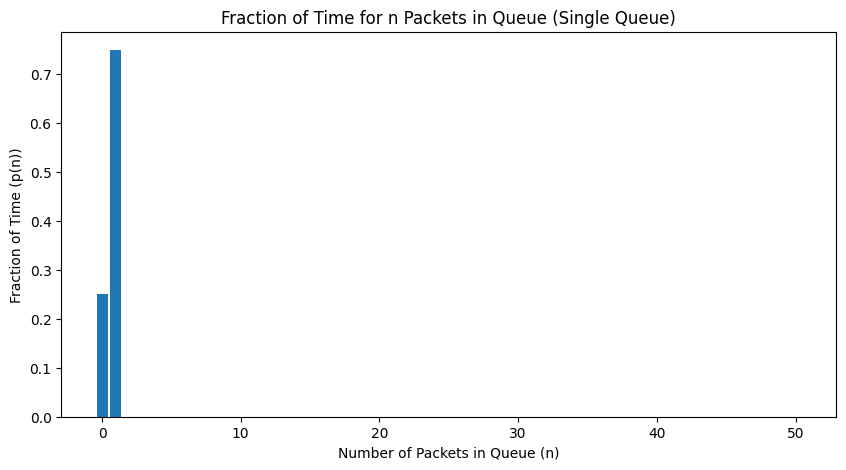

In [43]:
p = 0.4
q = 0.3
time_steps = 1000000
max_n = 50
queue_length = 0
time_count = np.zeros(max_n + 1)

for i in range(time_steps):

  t = np.random.rand()

  if t < p and queue_length>0:
    queue_length -= 1

  if t < q:
    queue_length += 1

  if queue_length <= max_n:
    time_count[queue_length] += 1

p_n = time_count / time_steps

plt.figure(figsize=(10, 5))
plt.bar(range(max_n + 1), p_n)
plt.xlabel('Number of Packets in Queue (n)')
plt.ylabel('Fraction of Time (p(n))')
plt.title('Fraction of Time for n Packets in Queue (Single Queue)')
plt.show()

# We will make independent by giving t chance to be calculated for both p and q

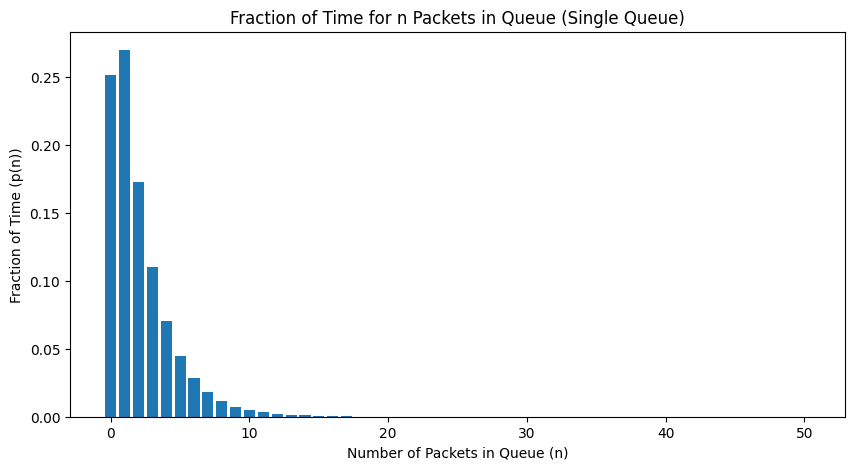

maximum fraction of time is at n = 1
Time average number of packets in memory (Single Queue): 2.09


In [44]:
p = 0.4
q = 0.3
time_steps = 1000000
max_n = 50

queue_length = 0
time_count = np.zeros(max_n + 1)
max_timecount_t = 0
max_timecount_c = 0

for i in range(time_steps):

  if np.random.rand() < p and queue_length>0:
    queue_length -= 1

  if np.random.rand() < q:
    queue_length += 1

  if queue_length <= max_n:
    time_count[queue_length] += 1
    if time_count[queue_length] > max_timecount_t:
      max_timecount_t = time_count[queue_length]
      max_timecount_c = queue_length

p_n = time_count / time_steps

plt.figure(figsize=(10, 5))
plt.bar(range(max_n + 1), p_n)
plt.xlabel('Number of Packets in Queue (n)')
plt.ylabel('Fraction of Time (p(n))')
plt.title('Fraction of Time for n Packets in Queue (Single Queue)')
plt.show()

print ('maximum fraction of time is at n = {}'.format(max_timecount_c))

average_packets_single = np.sum(np.arange(max_n + 1) * p_n)
print(f"Time average number of packets in memory (Single Queue): {average_packets_single:.2f}")

# Question 3
 Now extend the program from the previous part to simulate 10,000 queues in simultane
ously parallel. When you stop the simulation after 100,000 time steps you have 10,000
 values for the number of packets in the system. Use this data to plot p(n) the fraction
 of queues that have n packets in the system and calculate the sample average from this
 10,000 samples.

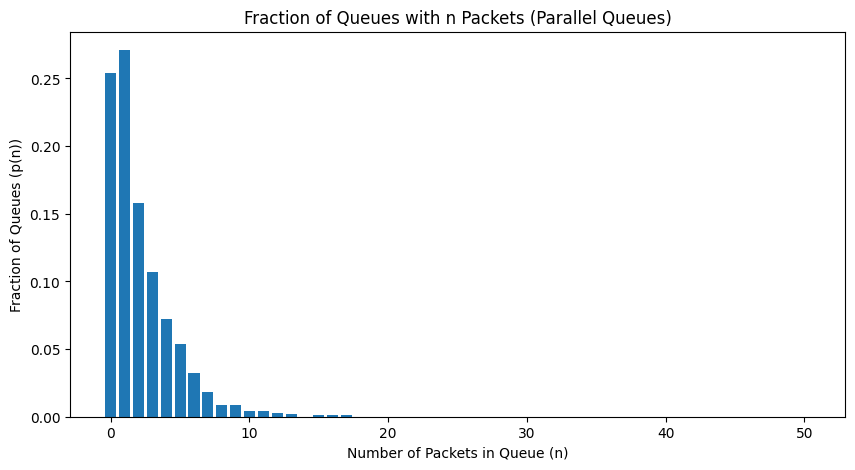

Sample average number of packets in memory (Parallel Queues): 2.13


In [45]:
queues = np.zeros(num_queues, dtype=int)
time_steps_2 = 100000
max_n = 50

for _ in range(time_steps_2):
    for i in range(num_queues):
        if queues[i] > 0 and np.random.rand() < p:
            queues[i] -= 1
        if np.random.rand() < q:
            queues[i] += 1

packet_counts_parallel = np.bincount(queues, minlength=max_n + 1)
p_n_parallel = packet_counts_parallel / num_queues

plt.figure(figsize=(10, 5))
plt.bar(range(max_n + 1), p_n_parallel)
plt.xlabel('Number of Packets in Queue (n)')
plt.ylabel('Fraction of Queues (p(n))')
plt.title('Fraction of Queues with n Packets (Parallel Queues)')
plt.show()

average_packets_parallel = np.mean(queues)
print(f"Sample average number of packets in memory (Parallel Queues): {average_packets_parallel:.2f}")

# Question 4
A jury of N members is to be constituted to decide on a complaint. In the population
 from which the jury has to be selected, each member makes the correct (fair) decision with
 probability (05 + c) 005 c 025 The majority rule is applied, i.e., all members vote
 yes/no and the majority vote is the decision of the panel. If the probability of the correct
 decision has to be at least 0.75, what combinations of c and N are feasible. Discretize c in
 steps of 0.01. You can assume N to be odd numbered integers. Repeat if the requirement
 is to be correct 90% of the time. Provide a short discussion of your ndings. Submit the
 plots for the combinations of c and N for the two correctness requirements.

In [47]:
c_vals = np.arange(0.05, 0.26, 0.01)
N_vals = np.arange(1, 101, 2)

def jury_correct_prob(N, p):
  k = (N // 2) + 1
  prob = 0.0
  for i in range(k, N + 1):
    prob += binom.pmf(i, N, p)
  return prob

for c in c_vals:
  p = 0.5 + c
  for N in N_vals:
    prob_correct = jury_correct_prob(N, p)
    print(f"c = {c:.2f}, N = {N}, Probability of Correct Decision: {prob_correct:.4f}")
#

c = 0.05, N = 1, Probability of Correct Decision: 0.5500
c = 0.05, N = 3, Probability of Correct Decision: 0.5747
c = 0.05, N = 5, Probability of Correct Decision: 0.5931
c = 0.05, N = 7, Probability of Correct Decision: 0.6083
c = 0.05, N = 9, Probability of Correct Decision: 0.6214
c = 0.05, N = 11, Probability of Correct Decision: 0.6331
c = 0.05, N = 13, Probability of Correct Decision: 0.6437
c = 0.05, N = 15, Probability of Correct Decision: 0.6535
c = 0.05, N = 17, Probability of Correct Decision: 0.6626
c = 0.05, N = 19, Probability of Correct Decision: 0.6710
c = 0.05, N = 21, Probability of Correct Decision: 0.6790
c = 0.05, N = 23, Probability of Correct Decision: 0.6865
c = 0.05, N = 25, Probability of Correct Decision: 0.6937
c = 0.05, N = 27, Probability of Correct Decision: 0.7005
c = 0.05, N = 29, Probability of Correct Decision: 0.7070
c = 0.05, N = 31, Probability of Correct Decision: 0.7132
c = 0.05, N = 33, Probability of Correct Decision: 0.7191
c = 0.05, N = 35, P

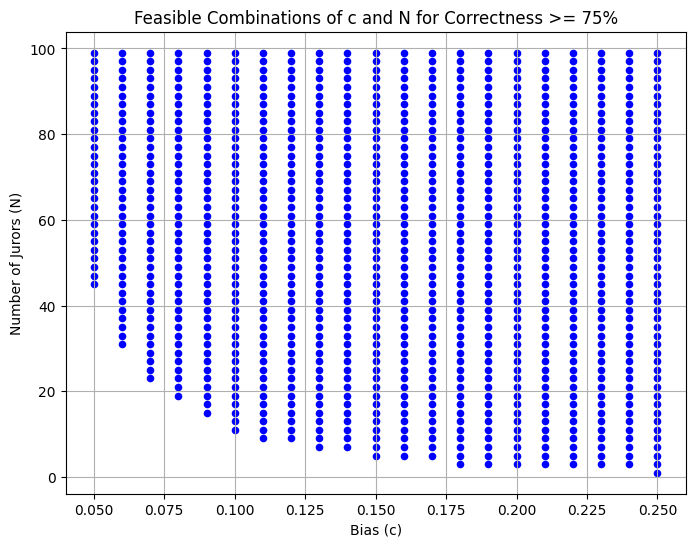

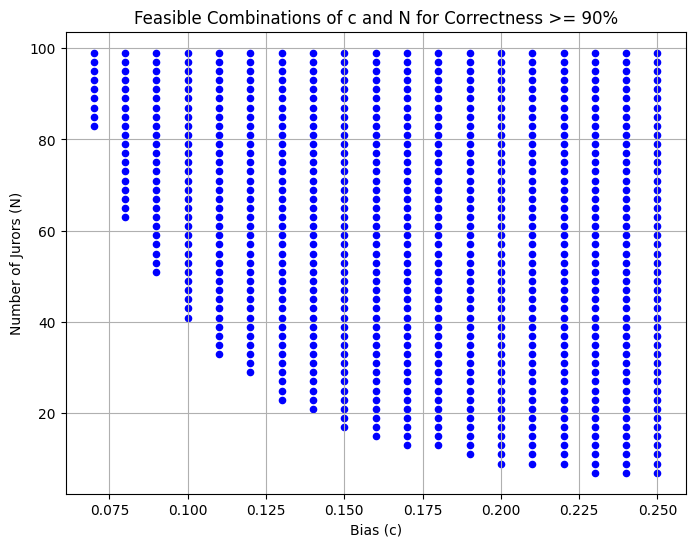

Feasible combinations for each correctness requirement have been plotted separately as points.


In [48]:
c_values = np.arange(0.05, 0.26, 0.01)
N_values = np.arange(1, 101, 2)

correctness_requirements = [0.75, 0.9]

def jury_correct_decision_probability(N, p):
    k = (N // 2) + 1
    probability = 0.0
    for i in range(k, N + 1):
        probability += comb(N, i) * (p ** i) * ((1 - p) ** (N - i))
    return probability

feasible_combinations = {requirement: [] for requirement in correctness_requirements}

for c in c_values:
    p = 0.5 + c
    for N in N_values:
        prob_correct = jury_correct_decision_probability(N, p)
        for requirement in correctness_requirements:
            if prob_correct >= requirement:
                feasible_combinations[requirement].append((c, N))

    plt.figure(figsize=(8, 6))
    combinations = feasible_combinations[requirement]
    c_vals, N_vals = zip(*combinations)
    plt.scatter(c_vals, N_vals, s=20, color='blue')
    plt.xlabel('Bias (c)')
    plt.ylabel('Number of Jurors (N)')
    plt.title(f'Feasible Combinations of c and N for Correctness >= {requirement*100:.0f}%')
    plt.grid(True)
    plt.show()

print("Feasible combinations for each correctness requirement have been plotted separately as points.")


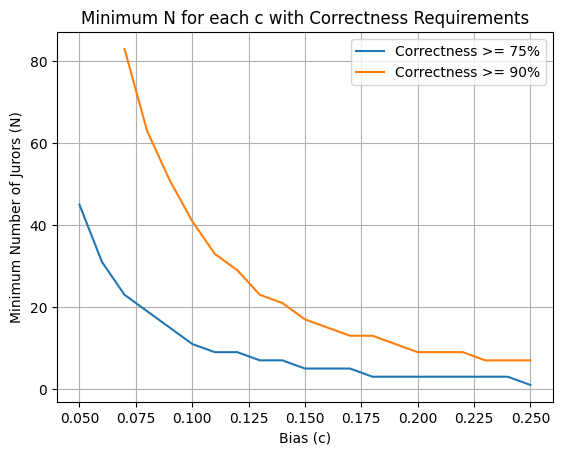

In [9]:
c_values = np.arange(0.05, 0.26, 0.01)
N_values = np.arange(1, 101, 2)

correctness_requirements = [0.75, 0.9]

def jury_correct_decision_probability(N, p):
    k = (N // 2) + 1
    probability = 0.0
    for i in range(k, N + 1):
        probability += comb(N, i) * (p ** i) * ((1 - p) ** (N - i))
    return probability

def compute_cost(a, b, N, c):
    p = 0.5 + c
    return a * N + b * p

def find_min_N_for_each_c(correctness_requirement):
    min_N_for_c = []
    for c in c_values:
        p = 0.5 + c
        min_N = None
        for N in N_values:
            prob_correct = jury_correct_decision_probability(N, p)
            if prob_correct >= correctness_requirement:
                min_N = N
                break
        if min_N is not None:
            min_N_for_c.append((c, min_N))
    return min_N_for_c

for requirement in correctness_requirements:
    min_N_for_c = find_min_N_for_each_c(requirement)

    c_vals, N_vals = zip(*min_N_for_c)

    plt.plot(c_vals, N_vals, label=f'Correctness >= {requirement*100:.0f}%')

plt.xlabel('Bias (c)')
plt.ylabel('Minimum Number of Jurors (N)')
plt.title('Minimum N for each c with Correctness Requirements')
plt.legend()
plt.grid(True)
plt.show()



Note that there is typically a cost involved with the choices of c and NA juror with a
 higher c is both rare and expensive. Similarly higher N makes the logistics of managing
 them complex. Suggest suitable cost functions that depend on c and N and comment on
 the right combination of c and N for each of the two preceding correctness requirements.

In [13]:
c_values = np.arange(0.05, 0.26, 0.01)
N_values = np.arange(1, 101, 2)

a = 1
b = 80

def jury_correct_decision_probability(N, p):
    k = (N // 2) + 1
    probability = 0.0
    for i in range(k, N + 1):
        probability += comb(N, i) * (p ** i) * ((1 - p) ** (N - i))
    return probability

def compute_cost(a, b, N, c):
    p = 0.5 + c
    return a * N + b * p

def find_min_N_for_each_c(correctness_requirement):
    min_N_for_c = []
    for c in c_values:
        p = 0.5 + c
        min_N = None
        for N in N_values:
            prob_correct = jury_correct_decision_probability(N, p)
            if prob_correct >= correctness_requirement:
                min_N = N
                break
        if min_N is not None:
            min_N_for_c.append((c, min_N))
    return min_N_for_c

correctness_requirement = 0.75
min_N_for_c = find_min_N_for_each_c(correctness_requirement)

df = pd.DataFrame(min_N_for_c, columns=['c', 'N'])

df['Cost'] = df.apply(lambda row: compute_cost(a, b, row['N'], row['c']), axis=1)

print(df)
min_cost_row = df.loc[df['Cost'].idxmin()]
print("\nMinimum Cost Details:")
print(f"Minimum Cost: {min_cost_row['Cost']:.4f}")
print(f"Associated Bias (c): {min_cost_row['c']:.2f}")
print(f"Associated Jurors (N): {min_cost_row['N']}")


       c   N  Cost
0   0.05  45  89.0
1   0.06  31  75.8
2   0.07  23  68.6
3   0.08  19  65.4
4   0.09  15  62.2
5   0.10  11  59.0
6   0.11   9  57.8
7   0.12   9  58.6
8   0.13   7  57.4
9   0.14   7  58.2
10  0.15   5  57.0
11  0.16   5  57.8
12  0.17   5  58.6
13  0.18   3  57.4
14  0.19   3  58.2
15  0.20   3  59.0
16  0.21   3  59.8
17  0.22   3  60.6
18  0.23   3  61.4
19  0.24   3  62.2
20  0.25   1  61.0

Minimum Cost Details:
Minimum Cost: 57.0000
Associated Bias (c): 0.15
Associated Jurors (N): 5.0


In [14]:
c_values = np.arange(0.05, 0.26, 0.01)
N_values = np.arange(1, 101, 2)

a = 1
b = 80

def jury_correct_decision_probability(N, p):
    k = (N // 2) + 1
    probability = 0.0
    for i in range(k, N + 1):
        probability += comb(N, i) * (p ** i) * ((1 - p) ** (N - i))
    return probability

def compute_cost(a, b, N, c):
    p = 0.5 + c
    return a * N + b * p

def find_min_N_for_each_c(correctness_requirement):
    min_N_for_c = []
    for c in c_values:
        p = 0.5 + c
        min_N = None
        for N in N_values:
            prob_correct = jury_correct_decision_probability(N, p)
            if prob_correct >= correctness_requirement:
                min_N = N
                break
        if min_N is not None:
            min_N_for_c.append((c, min_N))
    return min_N_for_c

correctness_requirement = 0.9
min_N_for_c = find_min_N_for_each_c(correctness_requirement)

df = pd.DataFrame(min_N_for_c, columns=['c', 'N'])

df['Cost'] = df.apply(lambda row: compute_cost(a, b, row['N'], row['c']), axis=1)

print(df)
min_cost_row = df.loc[df['Cost'].idxmin()]
print("\nMinimum Cost Details:")
print(f"Minimum Cost: {min_cost_row['Cost']:.4f}")
print(f"Associated Bias (c): {min_cost_row['c']:.2f}")
print(f"Associated Jurors (N): {min_cost_row['N']}")


       c   N   Cost
0   0.07  83  128.6
1   0.08  63  109.4
2   0.09  51   98.2
3   0.10  41   89.0
4   0.11  33   81.8
5   0.12  29   78.6
6   0.13  23   73.4
7   0.14  21   72.2
8   0.15  17   69.0
9   0.16  15   67.8
10  0.17  13   66.6
11  0.18  13   67.4
12  0.19  11   66.2
13  0.20   9   65.0
14  0.21   9   65.8
15  0.22   9   66.6
16  0.23   7   65.4
17  0.24   7   66.2
18  0.25   7   67.0

Minimum Cost Details:
Minimum Cost: 65.0000
Associated Bias (c): 0.20
Associated Jurors (N): 9.0
